<a href="https://colab.research.google.com/github/AdrianPerez0306/PredictorClima/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Prediccion del clima con dataset 'Weather in Szeged 2006-2016'***



Este dataset contiene datos del clima en Szeged, Hungria(2006-2016). El objetivo es poder realizar una prediccion aproximada del clima a partir de las variables climatologicas y contextuales que este dataset proporciona.

DESCARGA: https://www.kaggle.com/datasets/budincsevity/szeged-weather

NOTA: El csv esta adjunto en la entrega, de todas maneras se deja el link de descarga. Ingrese y deslice hacia abajo hasta encontrar la opcion de decarga.

Perez, Adrian Maximiliano


##*Descripcion del dataset*

- 0-Formatted Date: Fecha y hora con formato=>
```
#=> Año-Mes-dia   Hora-Minutos-Segundos-Milisegundos   zonaHorario_formatoGMT
```
- 1-Summary: Descripcion del clima en rango de 1 hora. (nublado, despejado, etc)
-2-Precip Type: Tipo de precipitacion. Lluvia o Nieve
-3-Temperature (C°):.
-4-Apparent Temperature (C°)
-5-Humidity: Humedad(En porcentaje? No especifica)
-6-Wind Speed (km/h): Velocidad del viento.
-7-Wind Bearing (degrees): Direccion del viento en grados.
-8-Visibility (km): Visibilidad.
-9-Loud Cover:
-10-Pressure (millibars): Presion.
-11-Daily Summary: Descripcion del clima a lo largo de un dia(24 horas).

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
drive.mount('/content/drive')
#########################################################
#IMPORTANTE ABAJO. YOU CAN´T SKIP THIS ADD*
########################################################
os.chdir('/content/drive/My Drive/Para ordenar/Matematica 3/Data')# *MODIFICAR LA RUTA A LA CARPETA DONDE CONTENGA EL ARCHIVO.
                                                     # ===>>>  '/content/drive/My Drive/aqui_su_ruta'

df_clima = pd.read_csv('weatherHistory.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##*Analisis exploratorio  y preprocesamiento del dataset.*

Primero miro la estructura del dataset y el tipo al que pertenecen los labels.

In [ ]:
nro_filas, nro_columnas= df_clima.shape[0], df_clima.shape[1]
print(f'El data set tiene:\n-Filas:{nro_filas}\n-Columnas:{nro_columnas}\n')

df_clima.info()

El data set tiene:
-Filas:96453
-Columnas:12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Como se puede observar la mayoria de los datos estan en formato "float64". Luego los datos de los labels "Formatted Date", "Summary", "Precip Type" y "Daily Summary" son object´s.En caso de utilizar estas variables es necesario convertirlos en algun formato numerico, es decir, pasarlo de variable categorica a variable numerica.

Miro si algun label contiene valores NaN

In [ ]:
df_clima.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

Solo el label 'Precip Type' tiene valores NaN.

In [ ]:
df_clima.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
df_clima['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

El label 'Precip Type' son categorias del estilo lloviendo/nevando.Se puede autocompletar, pero debido a que NaN podria significar desde "Ninguna precip" hasta "Precip extrema" y, ademas, son solo 517 de un total de 96000 aprox, es decir, un 0,5% de los datos, la decision de eliminar los datos nulos es a priori mas razonable, que hacer una mala interpretacion.

In [ ]:
df_clima.dropna(inplace=True)

Solo queda por ver si algun label contiene datos nulos.



In [ ]:
df_clima.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df_clima.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


Se puede ver que a priori el label "Loud Cover" contiene ceros.Ahora la pregunta es si contiene TODO ceros?

In [ ]:
print(f'Valor minimo:{df_clima["Loud Cover"].min():4}')
print(f'Valor maximo:{df_clima["Loud Cover"].max():4}')
print(f'Sumatoria:{df_clima["Loud Cover"].sum():7}')

Valor minimo: 0.0
Valor maximo: 0.0
Sumatoria:    0.0


Se confirma que el label "Loud Cover" son todo ceros, por lo tanto se puede eliminar.

In [ ]:
df_clima.drop(['Loud Cover'], axis=1, inplace=True)

Como la idea es predecir el clima a partir de variables meteorologicas, pero estas pueden variar segun la fecha en la que estemos, necesito extraer Año, Mes y Dia del label "Formatted Date", y los ordeno.|

In [ ]:
#Paso fecha(Formatted Date) en formato "objeto string" a formato "objeto datetime".
df_clima['Formatted Date'] = pd.to_datetime(df_clima['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z')

In [ ]:
df_clima.sort_values(by='Formatted Date', inplace=True)

In [ ]:
df_clima = df_clima.reset_index(drop=True)

In [ ]:
def extract_from_date(date, format):#Format es una lista con los features que quiera extraer de una fecha. Año, mes, dia, hora, etc...
  if format == 'Hour':
    return date.hour
  if format == 'Day':
    return date.day
  if format == 'Month':
    return date.month

In [ ]:
formatos = ['Day', 'Hour', 'Month']
for formato in formatos:
  df_clima[formato] = df_clima['Formatted Date'].apply(lambda x: extract_from_date(x, formato))


Una vez estan extraidos los features correctamente, puedo eliminar los labels "Formatted Date" y "Daily Summary" ya que son redundantes.

In [ ]:
df_clima.drop(['Formatted Date', 'Daily Summary'], axis=1, inplace=True)#

Ahora que el dataset esta mas limpio, hay que convertir variables categoricas a numericas y estandarizar los inputs, porque los rangos de las variables son muy dispersos.

In [ ]:
#CODIFICACION DE DATOS CATEGORICOS
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_clima['Summary(encoded)'] = df_clima['Summary']
df_clima['Precip Type'] = label_encoder.fit_transform(df_clima['Precip Type'])
df_clima['Summary(encoded)'] = label_encoder.fit_transform(df_clima['Summary(encoded)'])

In [ ]:
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95936 entries, 0 to 95935
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  object 
 1   Precip Type               95936 non-null  int64  
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  float64
 7   Visibility (km)           95936 non-null  float64
 8   Pressure (millibars)      95936 non-null  float64
 9   Day                       95936 non-null  int64  
 10  Hour                      95936 non-null  int64  
 11  Month                     95936 non-null  int64  
 12  Summary(encoded)          95936 non-null  int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 9.5+ MB


In [ ]:
df_clima.tail()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Day,Hour,Month,Summary(encoded)
95931,Mostly Cloudy,0,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,1020.03,31,19,12,17
95932,Mostly Cloudy,0,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,1020.27,31,20,12,17
95933,Mostly Cloudy,1,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,1020.50,31,21,12,17
95934,Mostly Cloudy,1,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,1020.65,31,22,12,17
95935,Mostly Cloudy,1,-0.677778,-3.888889,0.92,9.2253,189.0,8.8711,1020.72,31,23,12,17


In [ ]:
#NORMALIZACION DE LOS DATOS
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
df_clima[df_clima.columns[1:12]] = escalar.fit_transform(df_clima[df_clima.columns[1:12]])

In [ ]:
df_clima.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Day,Hour,Month,Summary(encoded)
0,Partly Cloudy,-0.354531,-1.187300,-1.391386,0.792748,0.911667,-0.442509,-0.091141,0.115198,-1.670684,-1.661476,-1.598185,19
1,Mostly Cloudy,-0.354531,-1.126350,-1.315706,0.588377,0.839550,-0.451822,-0.110429,0.110849,-1.670684,-1.517002,-1.598185,17
2,Mostly Cloudy,-0.354531,-1.073526,-1.307931,0.435100,1.365306,-0.442509,-0.110429,0.108461,-1.670684,-1.372528,-1.598185,17
3,Overcast,-0.354531,-1.068882,-1.218257,0.435100,0.532471,-0.442509,-0.110429,0.105818,-1.670684,-1.228055,-1.598185,18
4,Mostly Cloudy,-0.354531,-1.124028,-1.269573,0.639470,0.453374,-0.498383,-0.110429,0.100873,-1.670684,-1.083581,-1.598185,17


Ahora, con los datos estandizados y normalizados, queda ver como es la matriz de correlacion entre variables

<ipython-input-61-889a6b38eb48>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_clima.corr()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Precip Type'),
  Text(0, 1.5, 'Temperature (C)'),
  Text(0, 2.5, 'Apparent Temperature (C)'),
  Text(0, 3.5, 'Humidity'),
  Text(0, 4.5, 'Wind Speed (km/h)'),
  Text(0, 5.5, 'Wind Bearing (degrees)'),
  Text(0, 6.5, 'Visibility (km)'),
  Text(0, 7.5, 'Pressure (millibars)'),
  Text(0, 8.5, 'Day'),
  Text(0, 9.5, 'Hour'),
  Text(0, 10.5, 'Month'),
  Text(0, 11.5, 'Summary(encoded)')])

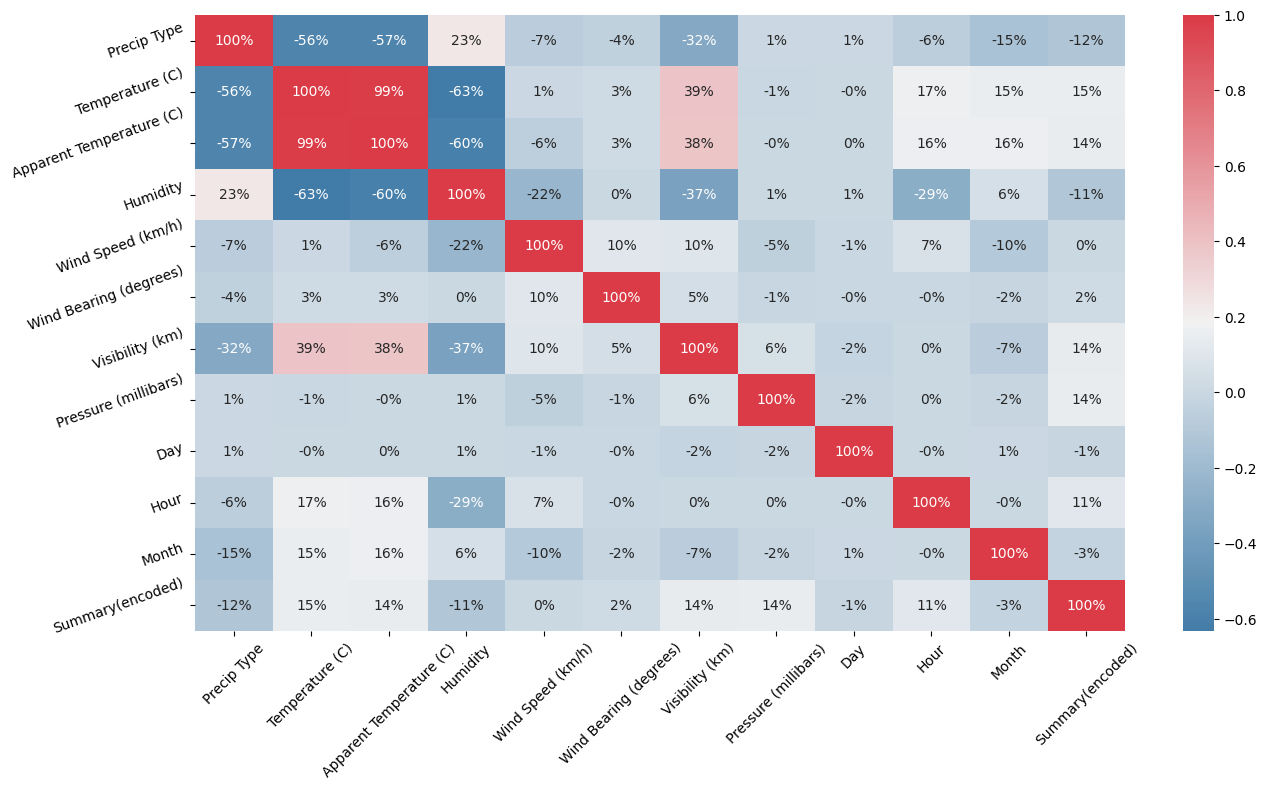

In [ ]:
#MATRIZ DE CORRELACION
import seaborn as sns
corr = df_clima.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True))
plt.xticks(rotation=45)
plt.yticks(rotation=20)

Se ve claramente que los labels "Temperature (C)" and "Apparent Temperature (C)" tienen una alta correlacion, por no decir que son iguales(corr=98%), entonces puedo sacar uno, ya que son practicamente lo mismo.

In [ ]:
df_clima.drop(['Apparent Temperature (C)'],axis=1, inplace=True)

Por ultimo se ve la distribucion del label "Summary" y su hermano codificado "Summary(encoded)". Se utilizan los 2 para tener una referencia a la codificacion hecha con LabelEncoder().

In [ ]:
def graficar(dataset, labels):
  for i, label in enumerate(labels):
    data = dataset[label]
    eje_y = data.value_counts().index
    eje_x =  data.value_counts().values
    plt.subplot(1, 2, i+1)
    plt.barh(eje_y, eje_x, align='center')
    plt.title(label)

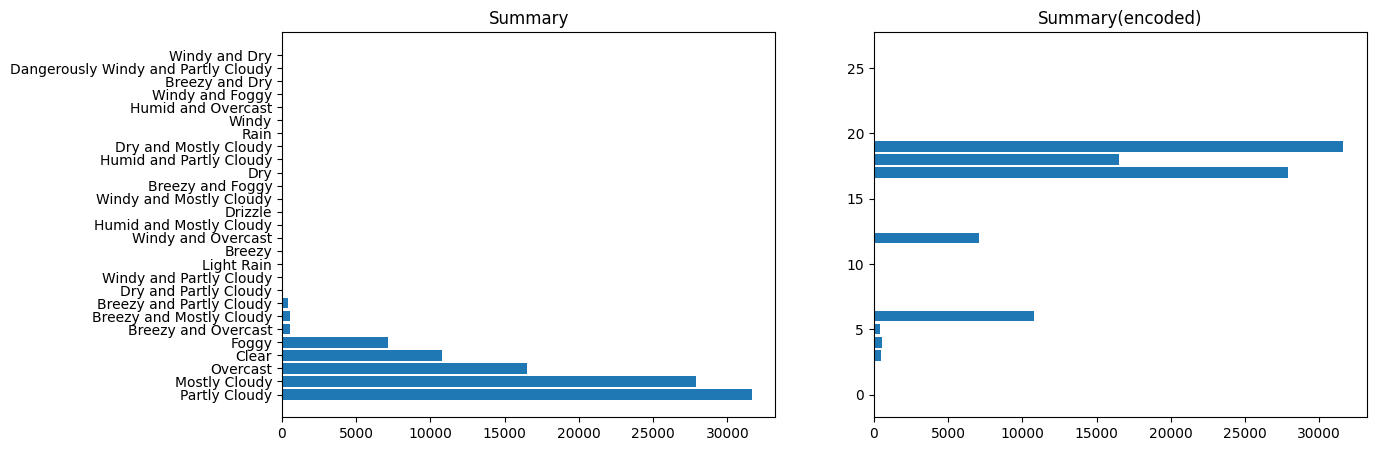

In [ ]:
plt.figure(figsize=(14,5))
labels = ['Summary', 'Summary(encoded)']
graficar(df_clima, labels)

Se observa que "Partly Cloudy", "Partly Cloudy" y "Partly Cloudy" son los mas frecuentes, y corresponden al rango 15-20(16-18 para ser mas preciso). Una vez visto esto, puedo eliminar el label "Summary" porque para la prediccion no es necesario ya que se usa "Summary(encoded)".

In [ ]:
df_clima.drop(['Summary'], axis=1, inplace=True)

##*Separacion train/test sets*

Ahora se separan en variables independientes(x) y variable dependiente(y), y tambienla cantidad de datos para ***entrenamiento/train_set(80%)*** y ***prueba/test_set(20%)***

In [ ]:
y = df_clima.iloc[:,-1]
x = df_clima.iloc[:,:10]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)# random_state = 1 es la semilla/seed

In [ ]:
from sklearn.linear_model import LinearRegression

regresor = LinearRegression()

regresor.fit(x_train, y_train)

LinearRegression()

In [ ]:
df_clima.drop(['Summary(encoded)'], axis=1, inplace=True)

##*Prediccion sobre datos de prueba(test_set)*

In [ ]:
y_predict = regresor.predict(x_test)

Comparacion de valores reales y valores predichos.

In [ ]:
df_real_vs_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df = df_real_vs_predict.head(25)
df.head()

,Actual,Predicted
37747,19,16.639148
50630,19,16.364360
91489,17,16.343811
30623,19,15.753090
71534,18,16.139148


Grafico de valores reales y valores predichos.

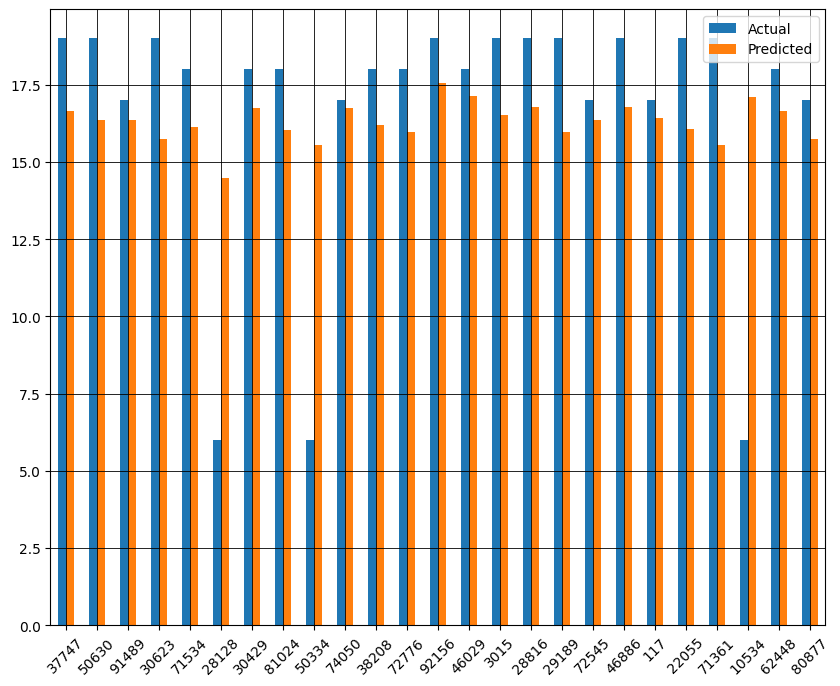

In [ ]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.6', color='black')
plt.grid(which='minor', linestyle='-', linewidth='0.6', color='black')
plt.xticks(rotation=45)
plt.show()

##*Metricas.*

In [ ]:
from sklearn import metrics

In [ ]:
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
mae = metrics.mean_absolute_error(y_test, y_predict)
median_ae = metrics.median_absolute_error(y_test, y_predict)

In [ ]:
print('Error cuadratico medio(MSE):', round(mse, 2))
print('Raiz cuadrada de MSE(RMSE):', round(rmse, 2))
print('Error medio absoluto:', round(mae, 2))
print('Error absoluto de mediana:', round(median_ae, 2))

Error cuadratico medio(MSE): 18.13
Raiz cuadrada de MSE(RMSE): 4.26
Error medio absoluto: 3.04
Error absoluto de mediana: 2.22


Viendo que el el RMSE es 4.26, aproximadamente el 20-25% del valor de la media, que es  ≈17,5. Esto muestra que el algoritmo tiene un gran marjen de mejora, pero aun asi es un valor razonable ya que el clima es muy impredecible. Esto lo vemos en el dia a dia incluso en la noticias cuando anuncian lluvias y no llueve(no se esta comparando este modelo predictor con el de los canales de noticias).
Algunas causas para la falta de precision pueden ser:
  - Analasis erroneo: La eleccion de "Summary(encoded)" como variable independiente puede haber sido una decision pobre.
  - Falta de datos: Una mayor cantidad de datos podria ayudar. En este caso se utilizaron 11 labels/columnas de distintas variables del clima. Una mayor cantidad de variables puede ser una solucion.